In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


In [50]:
# trainデータ
# X_train: 手書き数字の白黒画像 60,000枚 - {xi∈R28×28}i=1∼60000
# y_train: 手書き数字のラベル 60,000個 - {yi∈[0,1,…,9]}i=1∼60000
# testデータ
# X_test: 手書き数字の白黒画像 10,000枚 - {xi∈R28×28}i=1∼10000
# y_test: 手書き数字のラベル 10,000個 - {yi∈[0,1,…,9]}i=1∼10000

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [51]:
# 正規化
x_train, x_test = x_train / 255.0, x_test / 255.0

0.0 1.0


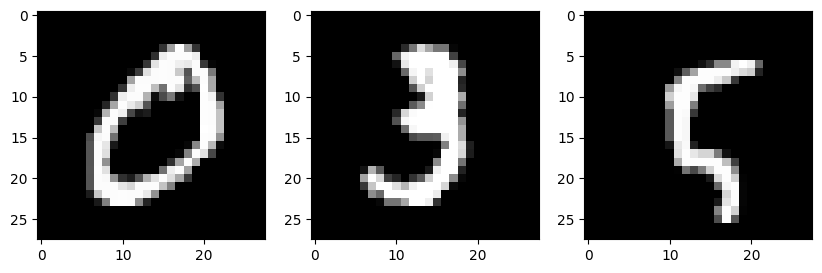

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for i, ax in zip([1, 10, 100], axs):
    ax.imshow(x_train[i], cmap="gray")
# ax.show()

In [65]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])
# 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

# # View model architecture
# model.summary()

In [88]:
# モデル
model = tf.keras.models.Sequential(
    [
        # (None, 28, 28) -> (None, 784)
        tf.keras.layers.Flatten(input_shape=(28, 28), name="input"),
        # Layer1: Linear mapping: (None, 784) -> (None, 512)
        tf.keras.layers.Dense(512, name="fc_1"),
        # Activation function: ReLU
        tf.keras.layers.Activation(tf.nn.relu, name="relu_1"),
        # Layer2: Linear mapping: (None, 512) -> (None, 256)
        tf.keras.layers.Dense(256, name="fc_2"),
        # Activation function: ReLU
        tf.keras.layers.Activation(tf.nn.relu, name="relu_2"),
        # Layer3: Linear mapping: (None, 256) -> (None, 256)
        tf.keras.layers.Dense(256, name="fc_3"),
        # Activation function: ReLU
        tf.keras.layers.Activation(tf.nn.relu, name="relu_3"),
        # Layer4: Linear mapping: (None, 256) -> (None, 10)
        tf.keras.layers.Dense(10, name="dense_3"),
        # Activation function: Softmax
        tf.keras.layers.Activation(tf.nn.softmax, name="softmax"),
    ]
)

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
# predictons = model(x_train[:1]).numpy()

In [90]:
# # tf.nn.softmax(predictons).numpy()
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictons).numpy()

In [91]:
# Compiling
# Set model & training information into machine memory (CPU or GPU)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
# Set callback functions which are called during model training
CSV_FILE_PATH = 'tensorflow_test.csv'
callbacks = []
callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

# Train model
history = model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=30,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8840 - loss: 0.3928 - val_accuracy: 0.9680 - val_loss: 0.1053
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9741 - loss: 0.0840 - val_accuracy: 0.9718 - val_loss: 0.0790
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9831 - loss: 0.0506 - val_accuracy: 0.9721 - val_loss: 0.0896
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9871 - loss: 0.0397 - val_accuracy: 0.9763 - val_loss: 0.0780
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9908 - loss: 0.0281 - val_accuracy: 0.9745 - val_loss: 0.0840
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9905 - loss: 0.0291 - val_accuracy: 0.9762 - val_loss: 0.0892
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9935 - loss: 0.0190 - val_accuracy: 0.9783 - val_loss: 0.0838
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9927 - loss: 0.0222 - val_

In [93]:
# Model evaluation
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))

print()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0202
loss(train): 0.02124
accuracy(train): 0.9957

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9760 - loss: 0.1865
loss(test): 0.1458
accuracy(test): 0.9803


In [94]:
df = pd.read_csv(CSV_FILE_PATH)
df.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.935367,0.215356,0.9680,0.105322
1,1,0.973550,0.084197,0.9718,0.079012
2,2,0.983133,0.053699,0.9721,0.089630
3,3,0.986350,0.041536,0.9763,0.078006
4,4,0.989300,0.033018,0.9745,0.083972


In [95]:
epochs = df["epoch"].values
train_acc = df['accuracy'].values
train_loss = df["loss"].values
test_acc = df['val_accuracy'].values
test_loss = df["val_loss"].values

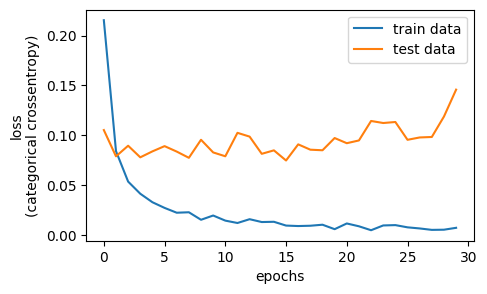

In [96]:
plt.figure(figsize=(5, 3))
plt.plot(epochs, train_loss, label="train data")
plt.plot(epochs, test_loss, label="test data")
plt.xlabel("epochs")
plt.ylabel("loss\n(categorical crossentropy)")
plt.legend(loc="upper right")
plt.show()

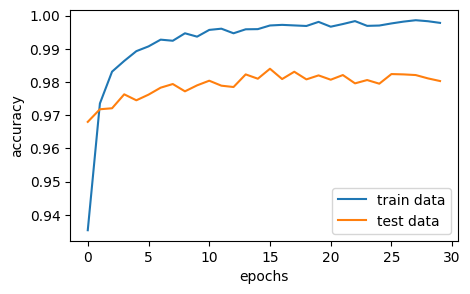

In [97]:
plt.figure(figsize=(5, 3))
plt.plot(epochs, train_acc, label="train data")
plt.plot(epochs, test_acc, label="test data")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.show()

In [87]:
for i in [0, 1, 2]:
    y_true = y_test[i]
    y_pred = model.predict_classes(x_test[i].reshape(1, 28, 28))[0]
    print("y_test_pred", "(i=" + str(i) + "): ", y_pred)
    print("y_test_true", "(i=" + str(i) + "): ", y_true)
    print("X_test", "(i=" + str(i) + "): ")
    plt.imshow(x_test[i], cmap="gray")
    plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_classes'